------------------
```markdown
# Copyright © 2024 Meysam Goodarzi
This notebook is licensed under CC BY-NC 4.0 with the following amandments:
- Individuals may use, share, and adapt this material for non-commercial purposes with attribution.
- Institutions/Companies must obtain written consent to use this material, except for nonprofits.
- Commercial use is prohibited without permission.  
Contact: analytica@meysam-goodarzi.com
```
------------------------------
❗❗❗ **IMPORTANT**❗❗❗ **Create a copy of this notebook**

In order to work with this Google Colab you need to create a copy of it. Please **DO NOT** provide your answers here. Instead, work on the copy version. To make a copy:

**Click on: File -> save a copy in drive**

Have you successfully created the copy? if yes, there must be a new tab opened in your browser. Now move to the copy and start from there!

----------------------------------------------


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import norm

# Conditional Probability and Bayes Theorem
This notebook is dedicated to the presenting the concepts of the conditional and joint probability as well as Bayes theorem.

## Dataset
Import the dataset from the previous sessions. We will apply the concepts of this course to this dataset.

In [6]:
# Import the RCT dataset
df = pd.read_csv("https://drive.google.com/uc?id=1znf0o6-4IqQ7EtvRCZxVYtjUjBNCmZuP")

df.head()

,school_id,student_id,sex,nationality,math_t1,language_t1,science_t1,avg_t1,math_t2,language_t2,science_t2,avg_t2,treatment
0,57,wvqgd@cunb.edu,1,1,2.046285,2.369783,2.711344,2.375804,1.175309,1.498807,1.840368,1.504828,1
1,57,j0ihe@cunb.edu,1,2,7.859077,7.206984,6.994455,7.353505,7.548812,6.896719,6.684190,7.043240,1
2,57,wcjgk@cunb.edu,2,1,7.118976,8.057449,8.573210,7.916545,6.181019,7.119492,7.635253,6.978588,1
3,57,mzmqb@cunb.edu,1,1,6.973737,7.388008,6.628448,6.996731,7.593102,8.007373,7.247812,7.616096,1
4,57,s6n0y@cunb.edu,1,1,6.574877,6.773626,7.844316,7.064273,7.611065,7.809814,8.880504,8.100461,1


## Conditional Probability
We define the conditional probability of event $X=x_i$, given that event $Y=y_i$ is true as:
$$P(X=x_i|Y=y_i) = \frac{P(X=x_i, Y=y_i)}{P(Y=y_i)},$$
where
$$P(X=x_i, Y=y_i) = P(X=x_i\land Y=y_i).$$
We can formulate the above symbol as the **probability that:**

**Event $X=x_i$ and event $Y=y_i$ happen** or \\
**Event $Y=y_i$ and event $X=x_i$ happen** or \\
**Event $X=x_i$ happens and then event $Y=y_i$ happens given that event $X=x_i$ has happened** or \\
**Event $Y=y_i$ happens and then event $X=x_i$ happens given that event $Y=y_i$ has happened**.

All above definitions are equivalent.


### Joint Probability Distribution Function (Joint PDF)
In the definitions above, if we obtain the values for each possible pair of events, i.e., the $P(X=x_i, Y=y_i)$ for all $i = 1, \cdots, N,$ we obtain a function which we call Joint PDF of random variables $X$ and $Y.$

#### Example
If $X$ and $Y$ are random variable representing an experiment where we roll a die and fliping an unfair coin, respectively, then the joint PDF is:

Y (coin)\X (die) --> | X=x_1 (=1) | X=x_2 (=2) | X=x_3 (=3) | X=x_4 (=4) | X=x_5 (=5) | X=x_6 (=6)
 :- | -: | :-: |  :-: | :-: | :-: | :-:
  $Y=y_1 (=H)$ | $p(x_1, y_1)$ | $p(x_2, y_1)$ | $p(x_3, y_1)$ | $p(x_4, y_1)$ | $p(x_5, y_1)$ | $p(x_6, y_1)$
  $Y=y_2 (=T)$ | $p(x_1, y_2)$ | $p(x_2, y_2)$ | $p(x_3, y_2)$ | $p(x_4, y_2)$ | $p(x_5, y_2)$ | $p(x_6, y_2)$

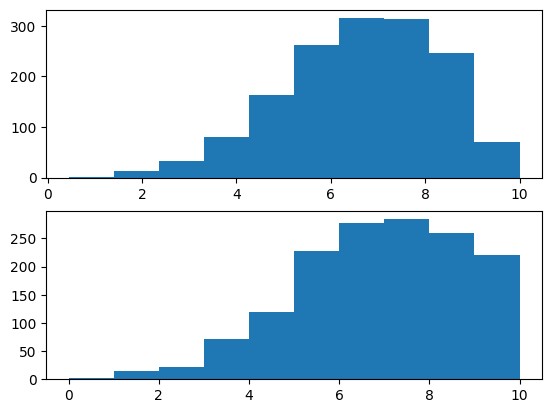

In [5]:
fig, ax = plt.subplots(nrows=2)

ax[0].hist(df["avg_t1"], bins=10)
ax[1].hist(df["avg_t2"], bins=10)

plt.show()


#### Exercise 1
Plot the joint pdf of $P(X, Y)$ where $X$ and $Y$ are random variables denoting the *school_id* and *avg_t1*, respectively.

{57: 1, 60: 2, 141: 3, 262: 4, 426: 5, 458: 6, 499: 7, 812: 8, 881: 9, 946: 10} 



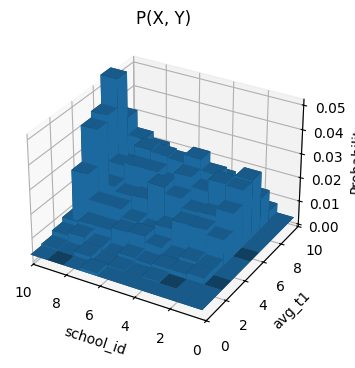

In [7]:
# Plot the 2d histogram
# Mapping the school IDs to sequential numbers for better visualisation
school_id_map = {school_id: i+1 for i, school_id in enumerate(sorted(df['school_id'].unique()))}
df['mapped_school_id'] = df['school_id'].map(school_id_map)

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111, projection='3d')

school_ids = list(df['mapped_school_id'].unique())
bins_avg = np.arange(0, 11)
bins_school = np.arange(0, len(school_ids)+1)
hist, _, _ = np.histogram2d(df["mapped_school_id"], df["avg_t1"], bins=[bins_school, bins_avg], density=True)

xpos, ypos = np.meshgrid(bins_school[:-1] + 0.5, bins_avg[:-1] + 0.5, indexing="ij")
avg_t1 = xpos.ravel()
avg_t2 = ypos.ravel()
zpos = 0

dx = dy = np.ones_like(zpos)
p_bc = hist.ravel()

print(school_id_map, "\n")
ax.bar3d(avg_t1, avg_t2, zpos, dx, dy, p_bc, zsort='average')
ax.set_xlim(10, 0)
ax.set_ylim(0, 10)
ax.set(title="P(X, Y)", xlabel="school_id", ylabel="avg_t1", zlabel="Probability");

Now calculate the following conditional probabilities.

In [10]:
# What is the probability of a student having an average grade in period 1 greater than 7 if they belong to the school with school_id=57
# Hint:
# X = A student's average grade in period 1
# Event x1 = A student having an average grade in period 1 greater than 7
# P(X=x1) = Probability of a student having an average grade in period 1 greater than 7

# Y = A student's school_id
# Event y1 = A student belonging to the school_id=57
# P(Y=y1) = probability of a student belonging to the school_id=57

# P(X=x1|Y=y1) = ???

# Calculate P(Y=y1)
p_y1 = df[df["school_id"] == 57].shape[0]/df.shape[0]
# Calculate P(X=x1, Y=y1)
p_x1y1 = df[(df["avg_t1"] > 7) & (df["school_id"] == 57)].shape[0]/df.shape[0]
# Calculate P(X=x1| Y=y1)
p_x1_y1 = p_x1y1/p_y1
print("P(X=x1, Y=y1) =", p_x1y1, "\n", "P(Y=y1) =", p_y1, "\n", "P(X=x1|Y=y1) =", p_x1_y1, "\n ----------")

# If a student's averge grade in period 1 is greater than 7, what is the probability that it belongs to the school_id=57?
# P(Y=y1|X=x1) = ???
# Calculate P(X=x1)
p_x1 = df[df["avg_t1"]>7].shape[0]/df.shape[0]
# Calculate P(Y=y1, X=x1)
p_y1x1 = df[(df["school_id"]==57) & (df["avg_t1"]>7)].shape[0]/df.shape[0]
# Calculate P(Y=y1|X=x1)
p_y1_x1 = p_y1x1/p_x1
print("P(X=x1, Y=y1) =", p_y1x1, "\n", "P(X=x1) =", p_x1, "\n", "P(Y=y1|X=x1) =", p_y1_x1)

P(X=x1, Y=y1) = 0.042 
 P(Y=y1) = 0.1 
 P(X=x1|Y=y1) = 0.42 
 ----------
P(X=x1, Y=y1) = 0.042 
 P(X=x1) = 0.46 
 P(Y=y1|X=x1) = 0.09130434782608696


In [14]:
p_x1 = df[df["avg_t1"] > 7].shape[0]/df.shape[0]

p_y1x1 = df[(df["school_id"] == 57) & (df["avg_t1"] > 7)].shape[0]/df.shape[0]
print(p_x1, p_y1x1)

0.46 0.042


## Bayes Theorem
Bayes theorem tells us how to compute the probability of an event given information about another event. It can be directly derived from the conditional probability rule and can be written as:
$$P(X=x_i|Y=y_i) = \frac{P(Y=y_i|X=x_i)P(X=x_i)}{P(Y=y_i)}.$$

What does that mean?

In [ ]:
# P(X=x1) = Probability of a student having an average grade in period 1 greater than 7
# P(Y=y1) = probability of a student belonging to the school_id=57
# P(X=x1|Y=y1) = the probability of a student having an average grade in period 1 greater than 7 if the student belongs to the school with school_id=57
# P(Y=y1|X=x1) = the probability a student belongs to the school_id=57, given that the student's averge grade in period 1 is greater than 7

# Check if above relationship holds
print("P(Y=y1|X=x1)*P(X=x1) =", # Your code,
      "\n",
      "P(X=x1|Y=y1)*P(Y=y1) =", # Your code
      )

#### Exercise 2
We have received a message from the people in the field (the ones who collected the data) saying that they forgot to communicate the data about a student. Here is the info they have about the student:

school_id=??, student_id=axrf@cunb.edu, sex=???, avg_t1=2.7, avg_t2=???

They would like to go back to the school and figure out what was the sex and the avg_t2 of the student. From which school should they start.

**Hint**: In terms of Bayes theorem, what is the probability of the student being from the school_id=xx give that the student's avg_t1=2.7.


In [ ]:
# P(X=xi) = Probability of a student belonging to the school_id=i
# P(Y=y1) = Probability of a student having an average grade of 2.7 in period 1
# P(X=xi|Y=y1) = Probability of a student belonging to the school_id=i given the student's average grade in period 1 is 2.7

# Quantizing the grades and round them to the closest integer
bins=np.arange(0, 11)
all_school_ids = df["school_id"].unique()
print("Possible school IDs =", all_school_ids)
p_xi_y1 = []
for i in all_school_ids:
  # Probability of a student being from school_id=i
  p_xi = # Your code
  # Probability of a student having avg_t1 if it was from school_id=i
  # Hint: np.histogram return two arrays, the probability and the edge of bins
  probability, bin_edges = np.histogram(df[df["school_id"]==i]["avg_t1"], bins=bins, density=True)
  # Choose the probability of the avg_t1 grade being between 2 and 3
  p_y1_xi = probability[2]
  # Numenator of Bayes rule
  p_xi_y1 += [# Your code]
# Normalization (calculating the denumenator of Bayes rule)
p_xi_y1 = p_xi_y1/sum(p_xi_y1)
print("P(X=xi|Y=y1)_{for all i=0,..., 10} =", "\n", p_xi_y1)

#### Exercise 3
Repeat the same exercise above with the following data
school_id=??, student_id=axrf@cunb.edu, sex=???, avg_t1=1.7, avg_t2=2.3.

**Hint**: You can assume this is true $$P(X=x_i|Y=y_i, Z=z_i) = P(X=x_i|Y=y_i)P(X=x_i|Z=z_i).$$

In [ ]:
# P(X=xi) = Probability of a student belonging to the school_id=i
# P(Y=y1) = Probability of a student having an average grade of 1.7 in period 1
# P(Z=z1) = Probability of a student having an average grade of 2.3 in period 2
# P(X=xi| Y=y1, Z=z1) = Probability of a student belonging to the school_id=i
# given the student's average grade in period 1 is 1.7 and in period 2 is 2.3

# Quantizing the grades and round them to the closest integer
bins=np.arange(0, 11)
all_school_ids = df["school_id"].unique()
print("Possible school IDs =", all_school_ids, "\n-------")
p_xi_y1 = []
p_xi_z1 = []
for i in all_school_ids:
  # Probability of a student being from school_id = i
  p_xi = df[df["school_id"] == i].shape[0]/df.shape[0]
  # Probability of a student having avg_t1 if it was from school_id=i
  probability, bin_edges = # Your code
  # Choose the probability of the avg_t1 grade being between 1 and 2
  p_y1_xi = # Your code
  # Probability of a student having avg_t2 if it was from school_id=i
  probability, bin_edges = # Your code
  # Choose the probability of the avg_t2 grade being between 2 and 3
  p_z1_xi = # Your code
  # Numenator of Bayes rule
  p_xi_y1 += [p_y1_xi*p_xi]
  p_xi_z1 += [# Your code]
p_xi_y1z1 = np.array(p_xi_y1)*np.array(p_xi_z1)
# Normalization (calculating the denumenator of Bayes rule)
# Your code
print("P(X=xi| Y=y1)_{for all i=0,..., 10} =", "\n", p_xi_y1/sum(p_xi_y1), "\n------\n",
      "P(X=xi| Z=z1)_{for all i=0,..., 10} =", "\n", p_xi_z1/sum(p_xi_z1), "\n------\n",
      "P(X=xi| Y=y1, Z=z1)_{for all i=0,..., 10} =", "\n", p_xi_y1z1)

### Independence
Two random variables $X$ and $Y$ are called independent if $P(X, Y) = P(X)P(Y),$ i.e., knowledge about $X$ does not provide any knowledge about $Y$ and vice versa.


**Quiz**: What would $P(Z|X, Y)$ turn into if we know that $X$ and $Y$ are independent?

#### Exercise 4
In the previous exercise, what if $$P(X=x_i|Y=y_i, Z=z_i) \neq P(X=x_i|Y=y_i)P(X=x_i|Z=z_i).$$ What does that mean? What would be the solution in that case?

In [ ]:
# plot the 2d histogram
school_ids = list(df["school_id"].unique())
fig = plt.figure(figsize=(40, 40))
for i in school_ids[:3]:
  ax = fig.add_subplot(1, len(school_ids), school_ids.index(i)+1, projection='3d')
  bins = np.arange(0, 11)
  hist, _, _ = np.histogram2d(df[df["school_id"]==i]["avg_t1"], df[df["school_id"]==i]["avg_t2"], bins=[bins, bins], density=True)

  xpos, ypos = np.meshgrid(bins[:-1] + 0.5, bins[:-1] + 0.5, indexing="ij")
  avg_t1 = xpos.ravel()
  avg_t2 = ypos.ravel()
  zpos = 0

  dx = dy = np.ones_like(zpos)
  p_bc = hist.ravel()

  ax.bar3d(avg_t1, avg_t2, zpos, dx, dy, p_bc, zsort='average')
  ax.set_xlim(10, 0)
  ax.set_ylim(0, 10)
  ax.set(title=r"P($X=%d| Y=y_i, Z=z_i$)"%i, xlabel="avg_t1", ylabel="avg_t1", zlabel=r"P(Y=$y_i$, Z=$z_i$)");

In [ ]:
# P(X=xi) = Probability of a student belonging to the school_id=i
# P(Y=y1) = Probability of a student having an average grade of 1.7 in period 1
# P(Z=z1) = Probability of a student having an average grade of 2.3 in period 2
# P(X=xi| Y=y1, Z=z1) = Probability of a student belonging to the school_id=i
# given the student's average grade in period 1 is 1.7 and in period 2 is 2.3

bins = np.arange(0, 11)
all_school_ids = df["school_id"].unique()
print("Possible school IDs =", all_school_ids)
p_xi_y1z1 = []
for i in all_school_ids:
  # probability of a student being from school_id = i
  p_xi = # Your code
  # probability of a student having avg_t1 if it was from school_id=i
  probability, _, _ = np.histogram2d(df[df["school_id"]==i]["avg_t1"], df[df["school_id"]==i]["avg_t2"], bins=[bins, bins], density=True)
  # Choose the probability of the avg_t1 grade being between 1 and 2 and the avg_t2 grade being between 2 and 3
  p_y1z1_xi = # Your code
  # Numenator of Bayes rule
  p_xi_y1z1 += [# Your code]
# Normalization (calculating the denumenator of Bayes rule)
p_xi_y1z1 = p_xi_y1z1/sum(p_xi_y1z1)
print("P(X=xi| Y=y1, Z=z1)_{for all i=0,..., 10} =", "\n", p_xi_y1z1)

**Congratulations! You have finished the Notebook! Great Job!**
🤗🙌👍👏💪
<!--
# Copyright © 2024 Meysam Goodarzi
This notebook is licensed under CC BY-NC 4.0 with the following amandments:
- Individuals may use, share, and adapt this material for non-commercial purposes with attribution.
- Institutions/Companies must obtain written consent to use this material, except for nonprofits.
- Commercial use is prohibited without permission.  
Contact: analytica@meysam-goodarzi.com.
-->